In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = 'dataset/train/one-piece-1668165.jpg'
pic1 = cv2.imread(file_name)

In [3]:
pic1_gray = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)

In [4]:
def show_image(image1, image2=None):
    if image2 is None:
        fig, ax = plt.subplots(1, figsize=(8, 14))
        ax.imshow(image1, cmap='gray')
        ax.axis('off')
    else:
        fig, ax = plt.subplots(1, 2, figsize=(14, 24))
        ax[0].imshow(image1, cmap='gray')
        ax[0].axis('off')

        ax[1].imshow(image2, cmap='gray')
        ax[1].axis('off')
    plt.show()

(1100, 725)


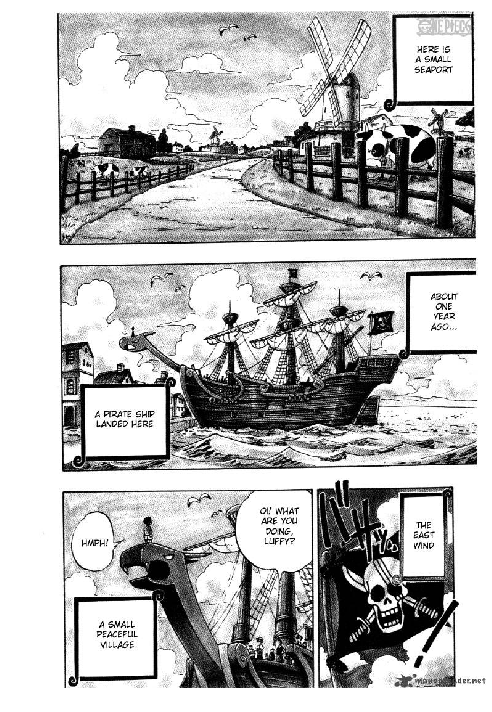

In [5]:
print(pic1_gray.shape)
show_image(pic1_gray)

## Edge detection

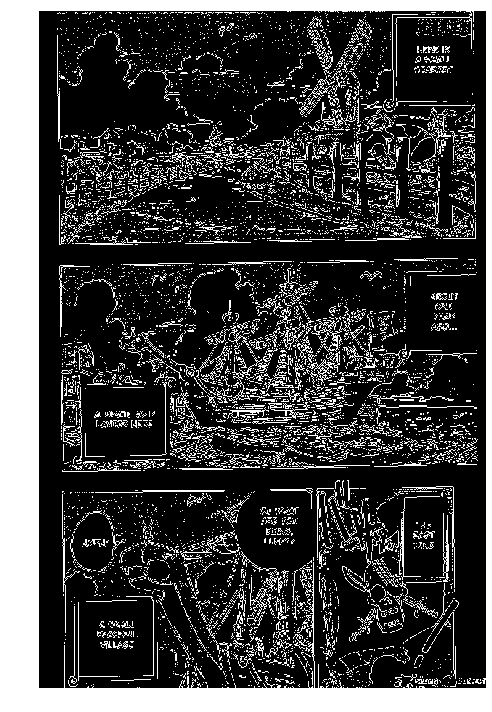

In [6]:
edged1 = cv2.Canny(pic1_gray, 250, 255)
show_image(edged1)

In [7]:
med_val = np.median(pic1_gray)
lower = int(max(0, 0.7 * med_val))
upper = int(min(255,1.3 * med_val))

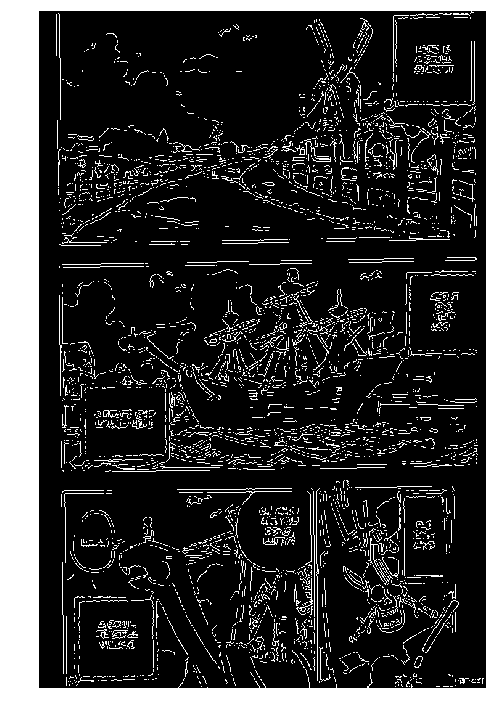

In [8]:
blurred_img = cv2.blur(pic1_gray, ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)

show_image(edges)

## Contours detection

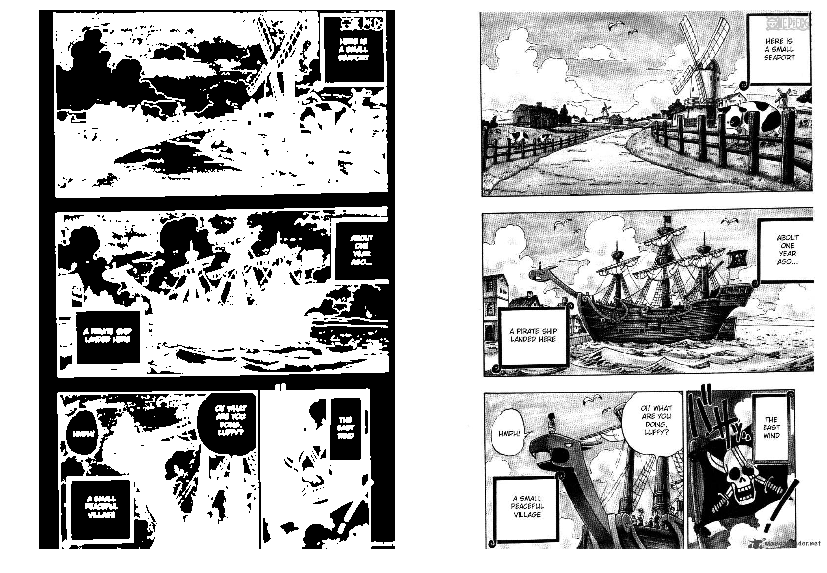

In [9]:
blurred_img = cv2.blur(pic1_gray, ksize=(4,4))
thresh = cv2.threshold(blurred_img, 220, 255, cv2.THRESH_BINARY_INV)[1]
show_image(thresh, pic1)

In [44]:
def detect_contours(image_path):
    pic = cv2.imread(image_path)
    pic_gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    
    blurred_img = cv2.blur(pic_gray, ksize=(4,4))
    thresh = cv2.threshold(blurred_img, 220, 255, cv2.THRESH_BINARY_INV)[1]

    # Set up empty array
    size = list(pic.shape[:2])
    img = pic.copy()

    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
    external_contours = np.zeros(blurred_img.shape)
    panels = {
        'quantity': 0,
        'positions': []
    }

    for i in range(len(contours)):
        contour = contours[i]
        arclength = cv2.arcLength(contour, True)
        epsilon = 0.01 * arclength
        approx = cv2.approxPolyDP(contour, epsilon, True)
        x, y, w, h = cv2.boundingRect(approx)
        # exclude very small panels
        if w < size[1] / 15 or h < size[0] / 15:
            continue
            
        panels['quantity'] += 1
        panels['positions'].append([(x, y), (x + w, y + h)])

        text = str(len(approx))
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text, (x, y + 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 4)

    print('{0} panels were parsed'.format(panels['quantity']))
    show_image(thresh, img)

5 panels were parsed


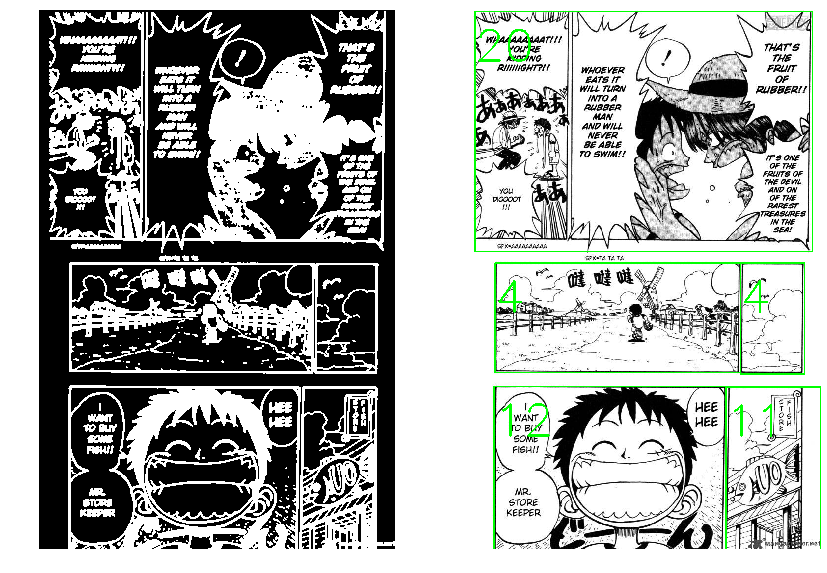

In [53]:
detect_contours('dataset/train/one-piece-1668182.jpg')

- Segment text and remove it
- GAN to blend context